In [1]:
#some code for checking gpu
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import os
import tqdm
import pandas as pd
import time, warnings
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from PIL import Image
from sklearn.model_selection import KFold
import keras_tuner
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.trial import Trial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneGroupOut, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import random
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
    Activation,
)


In [5]:
def normalize(clip):
    normalized_clip = (clip - np.min(clip)) / (np.max(clip) - np.min(clip))
    return normalized_clip

def conv_array(root_folder):
    metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8kv2/Data_extracted_2/processed_data.csv')
    folds = {}
    for fold in metadata['fold'].unique():
        print(f"processing fold{fold}")
        fold_path = os.path.join(root_folder, f"fold{fold}")
        image_data = []
        all_labels = []
        shape = (76,33)
        if not os.path.exists(fold_path):
            print(f"fold{fold} folder not found error!")
            continue  # Skip if the folder doesn't exist
        filenames = metadata.loc[metadata['fold'] == fold, 'slice_file_name'].values
        for filename in tqdm.tqdm(filenames):
            png_filename = filename.replace('.wav', '.png')
            image_path = os.path.join(fold_path, png_filename)
            image = Image.open(image_path)
            row_num = metadata[metadata['slice_file_name'] == filename].index
            if not row_num.empty:
                image_array = np.array(image)
                if not image_array.shape == shape:
                    print("array has not expected shape error!")
                    continue
                image_array = normalize(image_array)
                image_array = image_array.reshape(76,33,1)
                label = metadata.iloc[row_num]['labelID'].values[0]
                all_labels.append(label)
                image_data.append(image_array)
        image_data = np.array(image_data)
        all_labels = np.array(all_labels)
        all_labels = to_categorical(all_labels, num_classes=10)
        #converting numpy arrays to tf.tensor for GPU optimization
        image_data_tensor = tensorflow.convert_to_tensor(image_data)
        all_labels_tensor = tensorflow.convert_to_tensor(all_labels)
        folds[f"fold{fold}"] = [image_data, all_labels]
    return folds


metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8kv2/Data_extracted_2/processed_data.csv')
root_folder = r"/content/drive/MyDrive/UrbanSound8kv2/Data_extracted_2/both"
data = conv_array(root_folder)
input_shape = data['fold1'][0].shape
print(input_shape)

processing fold5


100%|██████████| 936/936 [12:45<00:00,  1.22it/s]


processing fold10


100%|██████████| 837/837 [11:19<00:00,  1.23it/s]


processing fold2


100%|██████████| 888/888 [12:01<00:00,  1.23it/s]


processing fold6


100%|██████████| 823/823 [11:15<00:00,  1.22it/s]


processing fold1


100%|██████████| 873/873 [11:58<00:00,  1.22it/s]


processing fold9


100%|██████████| 816/816 [11:07<00:00,  1.22it/s]


processing fold7


100%|██████████| 838/838 [11:25<00:00,  1.22it/s]


processing fold4


100%|██████████| 990/990 [13:45<00:00,  1.20it/s]


processing fold3


100%|██████████| 925/925 [13:38<00:00,  1.13it/s]


processing fold8


100%|██████████| 806/806 [11:34<00:00,  1.16it/s]

(873, 76, 33, 1)


Training using fold1 as validation
Reloading Tuner from ./untitled_project/tuner0.json


  0%|          | 0/10 [00:00<?, ?it/s]

Training using fold5 as validation
Epoch 1/18
61/61 [==============================] - 1s 8ms/step - loss: 2.2117 - accuracy: 0.2175 - val_loss: 1.9723 - val_accuracy: 0.2543
Epoch 2/18
61/61 [==============================] - 0s 5ms/step - loss: 1.8570 - accuracy: 0.3132 - val_loss: 1.9193 - val_accuracy: 0.3109
Epoch 3/18
61/61 [==============================] - 0s 5ms/step - loss: 1.7011 - accuracy: 0.3634 - val_loss: 1.6982 - val_accuracy: 0.2778
Epoch 4/18
61/61 [==============================] - 0s 5ms/step - loss: 1.6617 - accuracy: 0.3872 - val_loss: 1.8156 - val_accuracy: 0.2949
Epoch 5/18
61/61 [==============================] - 0s 5ms/step - loss: 1.6075 - accuracy: 0.4143 - val_loss: 1.5228 - val_accuracy: 0.3932
Epoch 6/18
61/61 [==============================] - 0s 5ms/step - loss: 1.5495 - accuracy: 0.4370 - val_loss: 1.6402 - val_accuracy: 0.3675
Epoch 7/18
61/61 [==============================] - 0s 5ms/step - loss: 1.4947 - accuracy: 0.4428 - val_loss: 1.5580 - val_ac

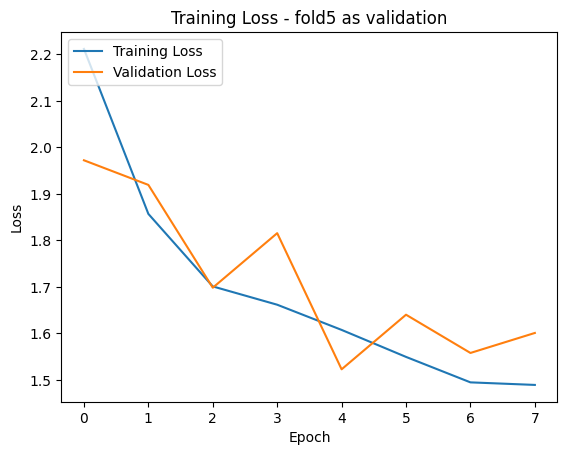

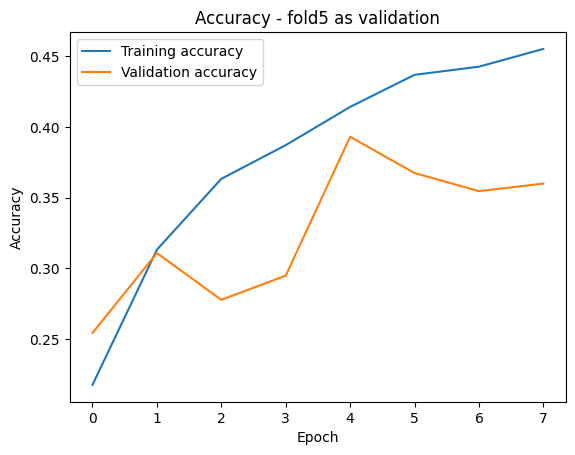

 10%|█         | 1/10 [00:05<00:45,  5.04s/it]

Training using fold10 as validation
Epoch 1/18
62/62 [==============================] - 2s 11ms/step - loss: 2.3583 - accuracy: 0.1851 - val_loss: 1.8163 - val_accuracy: 0.3393
Epoch 2/18
62/62 [==============================] - 0s 7ms/step - loss: 1.9119 - accuracy: 0.2963 - val_loss: 1.6720 - val_accuracy: 0.3967
Epoch 3/18
62/62 [==============================] - 0s 7ms/step - loss: 1.8040 - accuracy: 0.3269 - val_loss: 1.6963 - val_accuracy: 0.4014
Epoch 4/18
62/62 [==============================] - 0s 7ms/step - loss: 1.7349 - accuracy: 0.3581 - val_loss: 1.6485 - val_accuracy: 0.3345
Epoch 5/18
62/62 [==============================] - 0s 6ms/step - loss: 1.6312 - accuracy: 0.3958 - val_loss: 1.6445 - val_accuracy: 0.4217
Epoch 6/18
62/62 [==============================] - 0s 7ms/step - loss: 1.5631 - accuracy: 0.4139 - val_loss: 1.6291 - val_accuracy: 0.4194
Epoch 7/18
62/62 [==============================] - 0s 7ms/step - loss: 1.5211 - accuracy: 0.4427 - val_loss: 1.5849 - val_

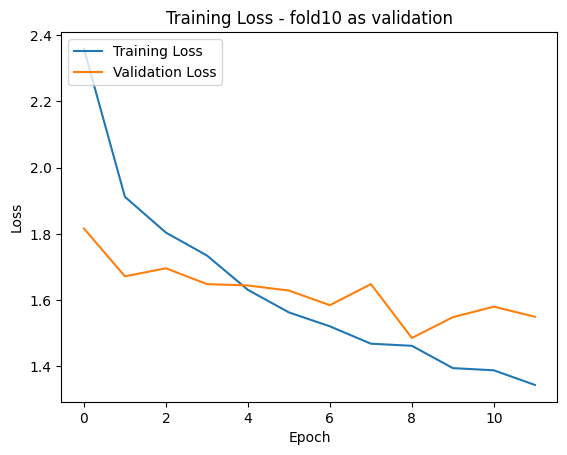

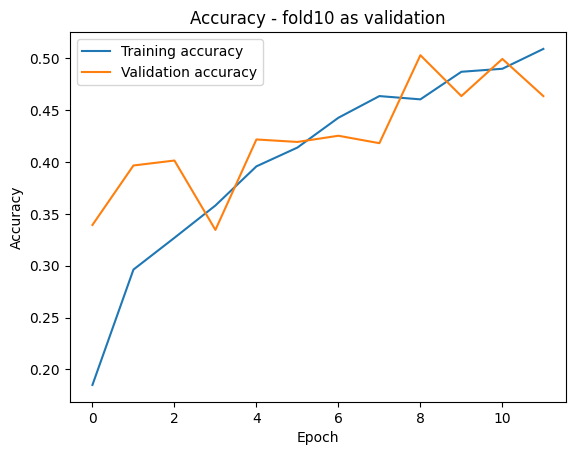

 20%|██        | 2/10 [00:17<01:13,  9.18s/it]

Training using fold2 as validation
Epoch 1/18
62/62 [==============================] - 1s 8ms/step - loss: 2.3968 - accuracy: 0.1744 - val_loss: 1.8882 - val_accuracy: 0.2635
Epoch 2/18
62/62 [==============================] - 0s 6ms/step - loss: 1.9769 - accuracy: 0.2698 - val_loss: 1.7336 - val_accuracy: 0.3052
Epoch 3/18
62/62 [==============================] - 0s 5ms/step - loss: 1.8378 - accuracy: 0.3098 - val_loss: 1.7250 - val_accuracy: 0.3311
Epoch 4/18
62/62 [==============================] - 0s 5ms/step - loss: 1.7060 - accuracy: 0.3628 - val_loss: 1.7089 - val_accuracy: 0.3874
Epoch 5/18
62/62 [==============================] - 0s 5ms/step - loss: 1.6686 - accuracy: 0.3886 - val_loss: 1.7331 - val_accuracy: 0.3559
Epoch 6/18
62/62 [==============================] - 0s 5ms/step - loss: 1.6326 - accuracy: 0.3970 - val_loss: 1.6136 - val_accuracy: 0.3908
Epoch 7/18
62/62 [==============================] - 0s 5ms/step - loss: 1.5402 - accuracy: 0.4354 - val_loss: 1.6738 - val_ac

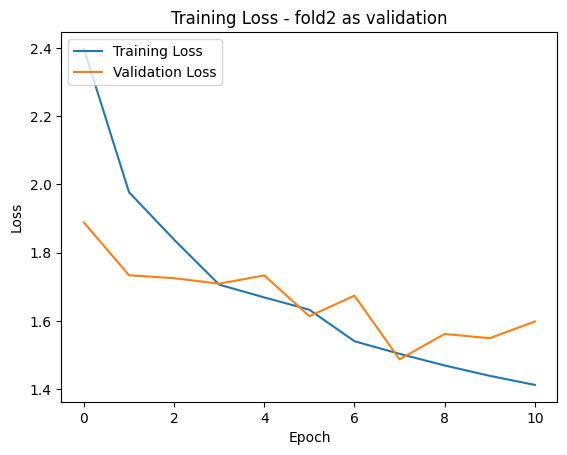

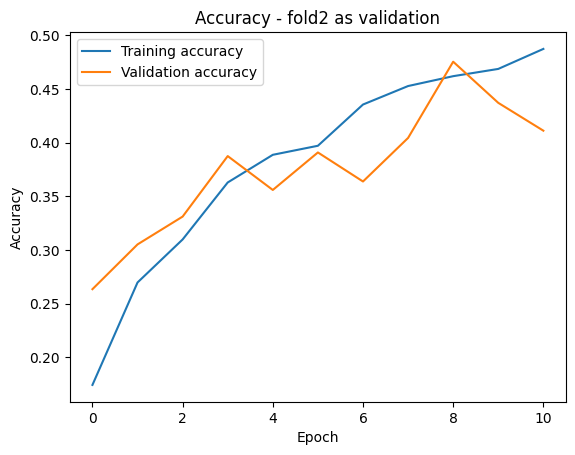

 30%|███       | 3/10 [00:23<00:54,  7.83s/it]

Training using fold6 as validation
Epoch 1/18
62/62 [==============================] - 2s 11ms/step - loss: 2.2763 - accuracy: 0.2012 - val_loss: 1.7897 - val_accuracy: 0.2770
Epoch 2/18
62/62 [==============================] - 0s 8ms/step - loss: 1.9173 - accuracy: 0.2990 - val_loss: 1.6078 - val_accuracy: 0.3463
Epoch 3/18
62/62 [==============================] - 0s 7ms/step - loss: 1.7684 - accuracy: 0.3400 - val_loss: 1.5290 - val_accuracy: 0.4119
Epoch 4/18
62/62 [==============================] - 0s 7ms/step - loss: 1.7005 - accuracy: 0.3736 - val_loss: 1.5329 - val_accuracy: 0.3390
Epoch 5/18
62/62 [==============================] - 0s 7ms/step - loss: 1.5891 - accuracy: 0.4090 - val_loss: 1.5238 - val_accuracy: 0.3827
Epoch 6/18
62/62 [==============================] - 0s 7ms/step - loss: 1.5808 - accuracy: 0.4236 - val_loss: 1.4381 - val_accuracy: 0.4447
Epoch 7/18
62/62 [==============================] - 0s 7ms/step - loss: 1.5107 - accuracy: 0.4420 - val_loss: 1.6025 - val_a

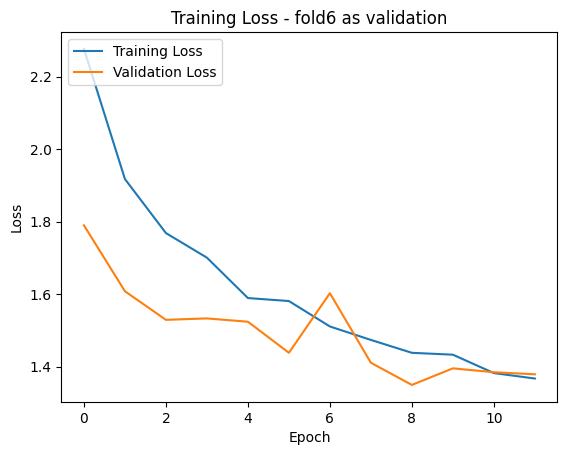

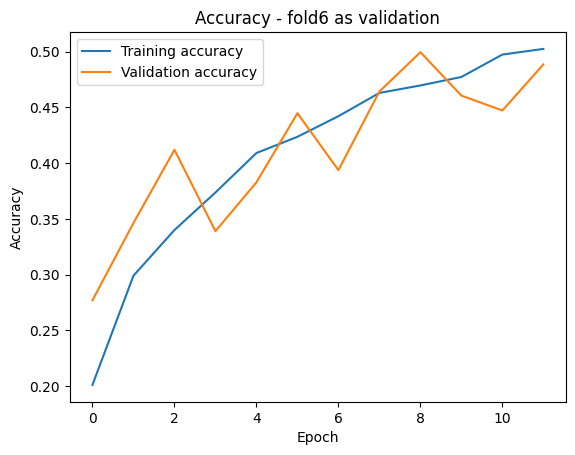

 40%|████      | 4/10 [00:35<00:57,  9.64s/it]

Training using fold1 as validation
Epoch 1/18
62/62 [==============================] - 1s 7ms/step - loss: 2.3472 - accuracy: 0.1809 - val_loss: 1.7766 - val_accuracy: 0.3104
Epoch 2/18
62/62 [==============================] - 0s 5ms/step - loss: 1.9275 - accuracy: 0.2904 - val_loss: 1.6631 - val_accuracy: 0.3872
Epoch 3/18
62/62 [==============================] - 0s 5ms/step - loss: 1.7703 - accuracy: 0.3400 - val_loss: 1.5692 - val_accuracy: 0.4318
Epoch 4/18
62/62 [==============================] - 0s 5ms/step - loss: 1.7054 - accuracy: 0.3624 - val_loss: 1.5518 - val_accuracy: 0.4135
Epoch 5/18
62/62 [==============================] - 0s 6ms/step - loss: 1.6549 - accuracy: 0.3843 - val_loss: 1.4613 - val_accuracy: 0.4765
Epoch 6/18
62/62 [==============================] - 0s 6ms/step - loss: 1.5645 - accuracy: 0.4190 - val_loss: 1.4331 - val_accuracy: 0.4880
Epoch 7/18
62/62 [==============================] - 0s 7ms/step - loss: 1.5309 - accuracy: 0.4378 - val_loss: 1.3955 - val_ac

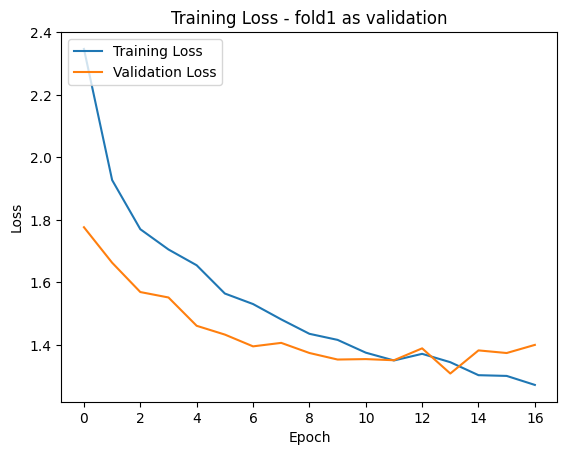

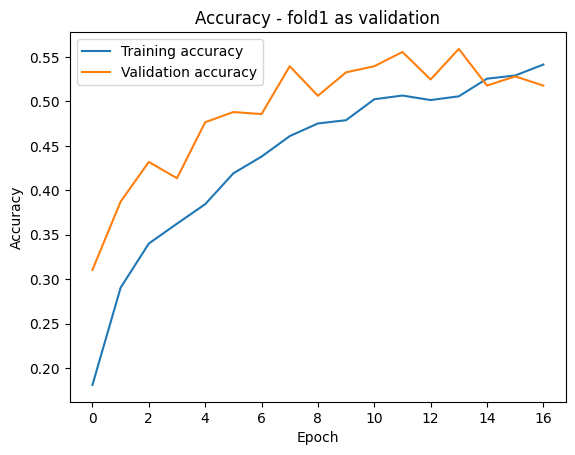

 50%|█████     | 5/10 [00:47<00:52, 10.53s/it]

Training using fold9 as validation
Epoch 1/18
62/62 [==============================] - 1s 8ms/step - loss: 2.2770 - accuracy: 0.1986 - val_loss: 1.8007 - val_accuracy: 0.2108
Epoch 2/18
62/62 [==============================] - 0s 5ms/step - loss: 1.8992 - accuracy: 0.3012 - val_loss: 1.7040 - val_accuracy: 0.2610
Epoch 3/18
62/62 [==============================] - 0s 5ms/step - loss: 1.7687 - accuracy: 0.3482 - val_loss: 1.7915 - val_accuracy: 0.3603
Epoch 4/18
62/62 [==============================] - 0s 5ms/step - loss: 1.6780 - accuracy: 0.3799 - val_loss: 1.5639 - val_accuracy: 0.3775
Epoch 5/18
62/62 [==============================] - 0s 5ms/step - loss: 1.6051 - accuracy: 0.4114 - val_loss: 1.5646 - val_accuracy: 0.4179
Epoch 6/18
62/62 [==============================] - 0s 6ms/step - loss: 1.5287 - accuracy: 0.4395 - val_loss: 1.6622 - val_accuracy: 0.4118
Epoch 7/18
26/26 [==============================] - 0s 4ms/step - loss: 1.5875 - accuracy: 0.4632
Validation accuracy: 0.4632

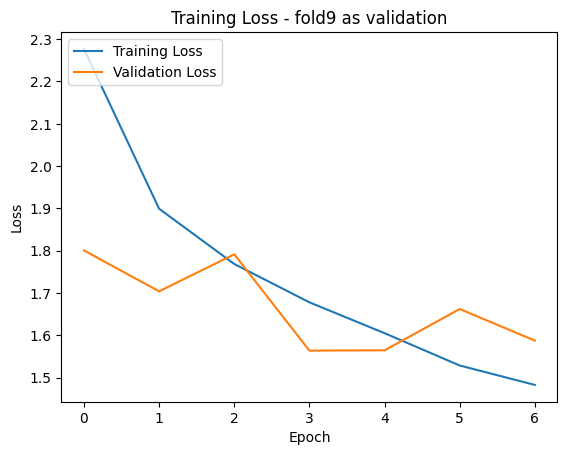

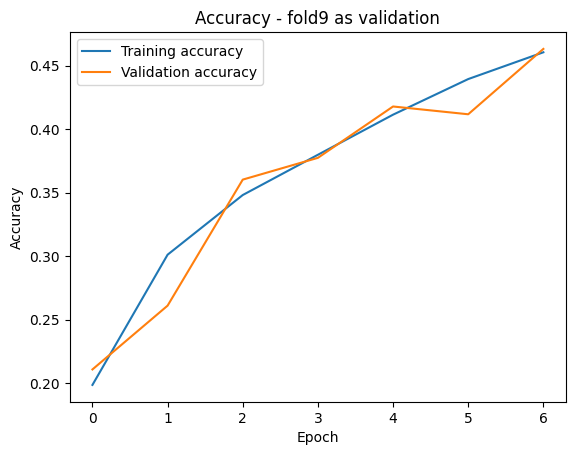

 60%|██████    | 6/10 [00:54<00:37,  9.32s/it]

Training using fold7 as validation
Epoch 1/18
62/62 [==============================] - 2s 11ms/step - loss: 2.3166 - accuracy: 0.1955 - val_loss: 1.8073 - val_accuracy: 0.2947
Epoch 2/18
62/62 [==============================] - 0s 8ms/step - loss: 1.9206 - accuracy: 0.2755 - val_loss: 1.6894 - val_accuracy: 0.3162
Epoch 3/18
62/62 [==============================] - 0s 8ms/step - loss: 1.7706 - accuracy: 0.3449 - val_loss: 1.7220 - val_accuracy: 0.3520
Epoch 4/18
62/62 [==============================] - 0s 7ms/step - loss: 1.7072 - accuracy: 0.3741 - val_loss: 1.5225 - val_accuracy: 0.3962
Epoch 5/18
62/62 [==============================] - 0s 7ms/step - loss: 1.6073 - accuracy: 0.4037 - val_loss: 1.5316 - val_accuracy: 0.4415
Epoch 6/18
62/62 [==============================] - 1s 8ms/step - loss: 1.5732 - accuracy: 0.4145 - val_loss: 1.6075 - val_accuracy: 0.3950
Epoch 7/18
62/62 [==============================] - 0s 7ms/step - loss: 1.4847 - accuracy: 0.4583 - val_loss: 1.4369 - val_a

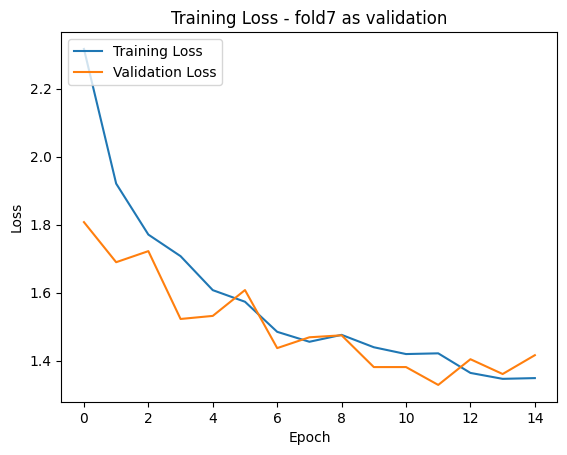

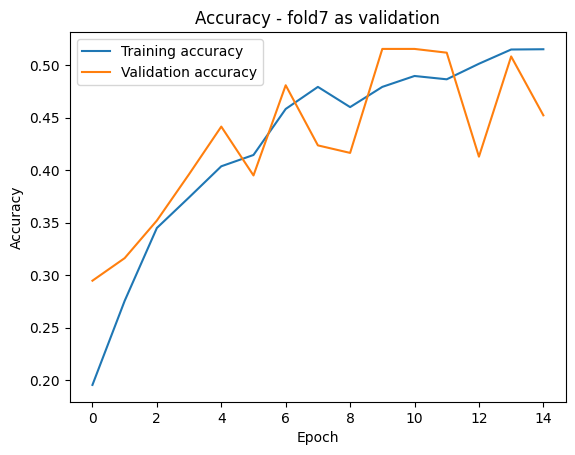

 70%|███████   | 7/10 [01:04<00:28,  9.35s/it]

Training using fold4 as validation
Epoch 1/18
61/61 [==============================] - 1s 9ms/step - loss: 2.3420 - accuracy: 0.1903 - val_loss: 2.0631 - val_accuracy: 0.2081
Epoch 2/18
61/61 [==============================] - 0s 5ms/step - loss: 1.9685 - accuracy: 0.2796 - val_loss: 1.8173 - val_accuracy: 0.2727
Epoch 3/18
61/61 [==============================] - 0s 6ms/step - loss: 1.7794 - accuracy: 0.3303 - val_loss: 1.6818 - val_accuracy: 0.3354
Epoch 4/18
61/61 [==============================] - 0s 5ms/step - loss: 1.7262 - accuracy: 0.3565 - val_loss: 1.4438 - val_accuracy: 0.4889
Epoch 5/18
61/61 [==============================] - 0s 6ms/step - loss: 1.6458 - accuracy: 0.3823 - val_loss: 1.4895 - val_accuracy: 0.4515
Epoch 6/18
61/61 [==============================] - 0s 6ms/step - loss: 1.5728 - accuracy: 0.4189 - val_loss: 1.5404 - val_accuracy: 0.4354
Epoch 7/18
31/31 [==============================] - 0s 3ms/step - loss: 1.6905 - accuracy: 0.3677
Validation accuracy: 0.3676

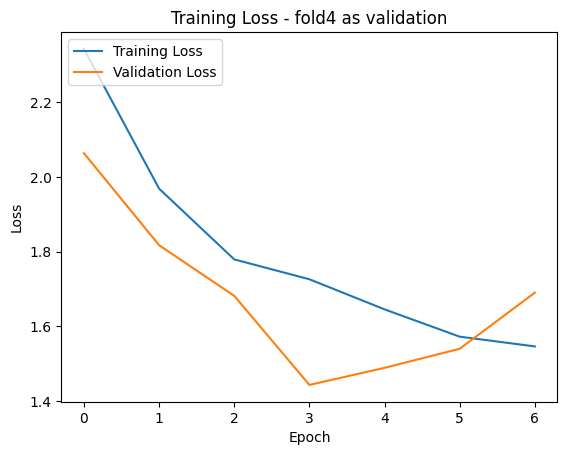

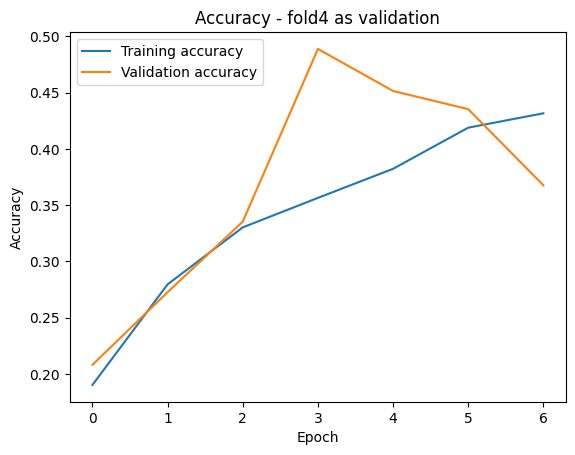

 80%|████████  | 8/10 [01:09<00:15,  7.95s/it]

Training using fold3 as validation
Epoch 1/18
61/61 [==============================] - 1s 9ms/step - loss: 2.3292 - accuracy: 0.1884 - val_loss: 1.9653 - val_accuracy: 0.2876
Epoch 2/18
61/61 [==============================] - 0s 6ms/step - loss: 1.8987 - accuracy: 0.3008 - val_loss: 1.6861 - val_accuracy: 0.3795
Epoch 3/18
61/61 [==============================] - 0s 6ms/step - loss: 1.7837 - accuracy: 0.3387 - val_loss: 1.7428 - val_accuracy: 0.3459
Epoch 4/18
61/61 [==============================] - 0s 7ms/step - loss: 1.6618 - accuracy: 0.3754 - val_loss: 1.5733 - val_accuracy: 0.3708
Epoch 5/18
61/61 [==============================] - 0s 7ms/step - loss: 1.5917 - accuracy: 0.4118 - val_loss: 1.5637 - val_accuracy: 0.4541
Epoch 6/18
61/61 [==============================] - 0s 7ms/step - loss: 1.5569 - accuracy: 0.4260 - val_loss: 1.5378 - val_accuracy: 0.4508
Epoch 7/18
61/61 [==============================] - 0s 7ms/step - loss: 1.4968 - accuracy: 0.4504 - val_loss: 1.5391 - val_ac

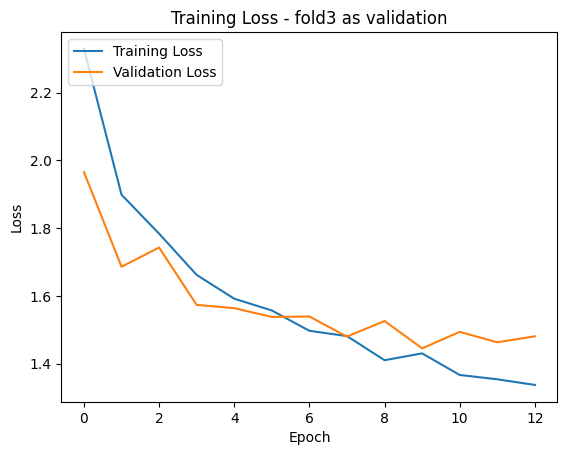

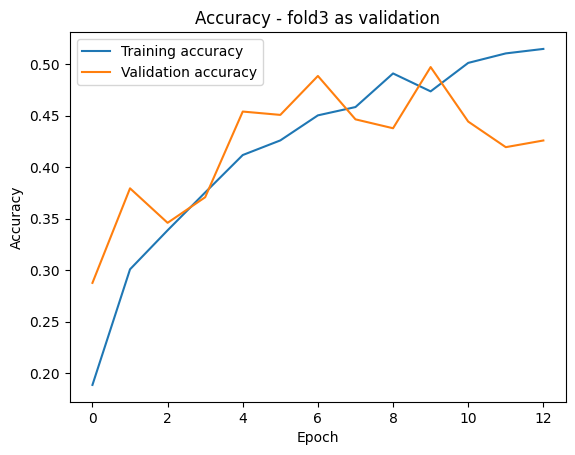

 90%|█████████ | 9/10 [01:21<00:09,  9.24s/it]

Training using fold8 as validation
Epoch 1/18
62/62 [==============================] - 1s 9ms/step - loss: 2.3303 - accuracy: 0.1850 - val_loss: 1.7624 - val_accuracy: 0.2878
Epoch 2/18
62/62 [==============================] - 0s 6ms/step - loss: 1.9450 - accuracy: 0.2805 - val_loss: 1.6300 - val_accuracy: 0.3747
Epoch 3/18
62/62 [==============================] - 0s 5ms/step - loss: 1.8358 - accuracy: 0.3152 - val_loss: 1.5220 - val_accuracy: 0.4541
Epoch 4/18
62/62 [==============================] - 0s 5ms/step - loss: 1.7444 - accuracy: 0.3419 - val_loss: 1.4984 - val_accuracy: 0.4764
Epoch 5/18
62/62 [==============================] - 0s 6ms/step - loss: 1.6849 - accuracy: 0.3706 - val_loss: 1.4644 - val_accuracy: 0.4752
Epoch 6/18
62/62 [==============================] - 0s 6ms/step - loss: 1.6241 - accuracy: 0.3979 - val_loss: 1.3341 - val_accuracy: 0.5397
Epoch 7/18
62/62 [==============================] - 0s 5ms/step - loss: 1.5676 - accuracy: 0.4198 - val_loss: 1.3409 - val_ac

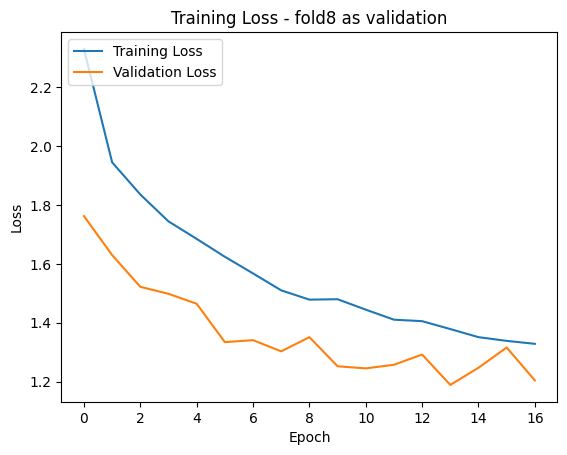

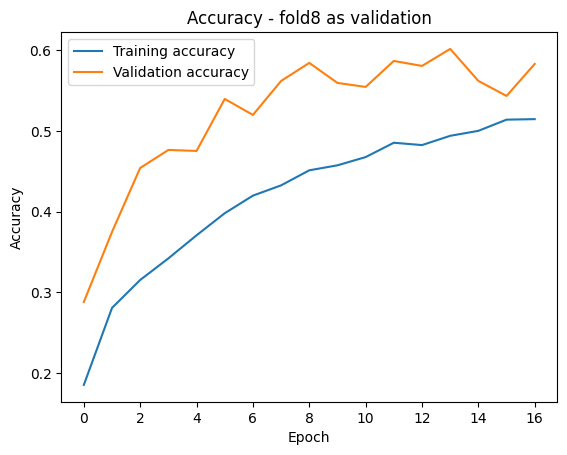

100%|██████████| 10/10 [01:30<00:00,  9.03s/it]


List of scores[0.3600427210330963, 0.4635603427886963, 0.41103604435920715, 0.4884568750858307, 0.517754852771759, 0.4632352888584137, 0.45226728916168213, 0.3676767647266388, 0.4259459376335144, 0.5831265449523926]
Average accuracy: 0.4533102661371231


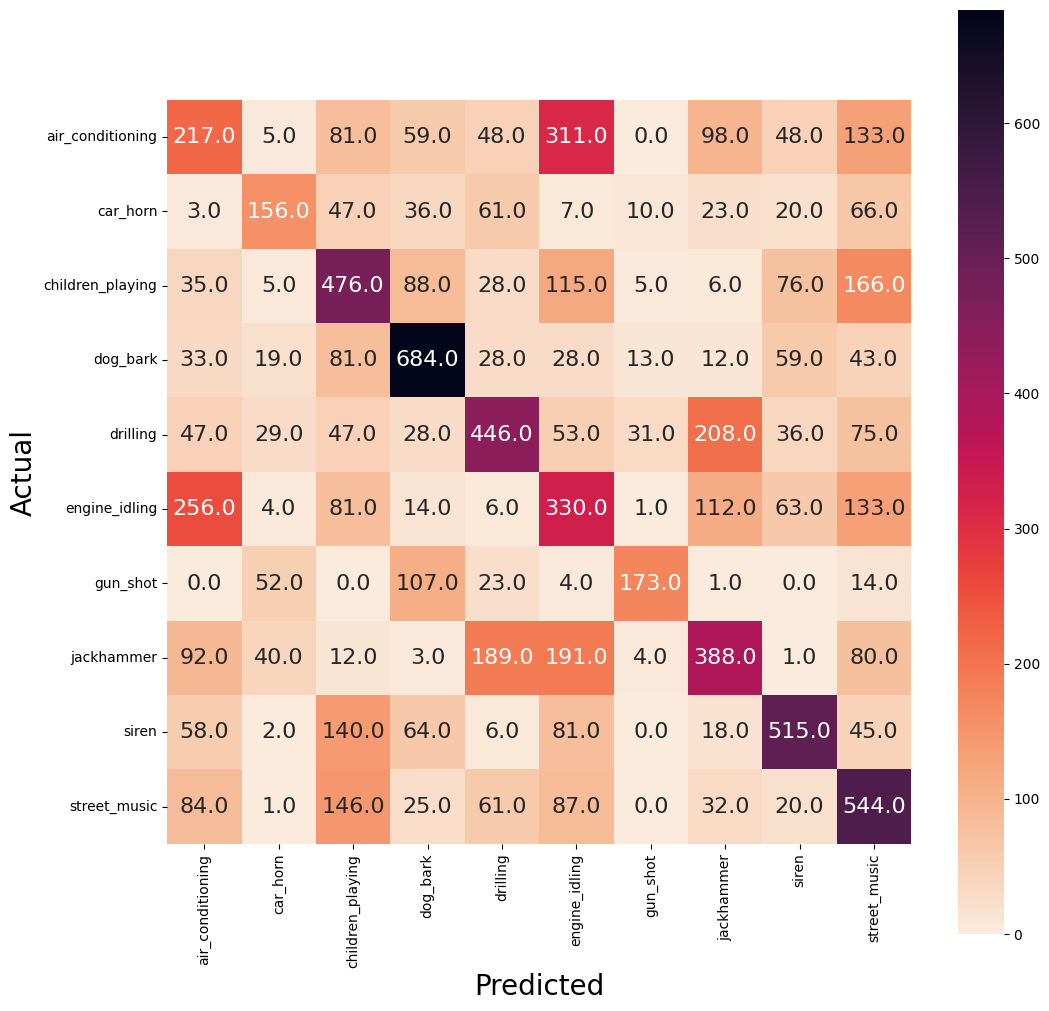

In [22]:
tensorflow.keras.backend.clear_session()
metric = 'accuracy' #evaluation metric
#metric = tensorflow.keras.metrics.MeanAveragePrecisionMetric(topn=2)
loss= 'categorical_crossentropy' #loss function

#training parameters
num_epoch = 30
batch_size =128
early_stop = 5 # early stoppping after 3 epochs with no improvement of test data

#objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.
objective='val_loss'
max_trials = 8 # how many model variations to test?
max_trial_retrys = 3 # how many trials per variation? (same model could perform differently)

# metadata.head(10)
# sns.countplot(metadata, y="class")
#plt.show()

#Building a hypermodel:
# function to build a hypermodel
# takes an argument from which to sample hyperparameters

def build_model(hp):
    model = Sequential()

    input_shape = data['fold1'][0].shape[1:]

    # Flatten the input for MLP
    model.add(Flatten(input_shape=input_shape))

    # Add dense layers
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Dense(hp.Choice(f'dense_{i}_units',
                                  values=[128, 256, 512, 1024])))
        model.add(Activation('tanh'))

        # Adding dropout
        model.add(Dropout(rate=hp.Float('rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss=loss,
                  metrics=[metric])

    return model


#get optimal hyperparameters using
def tuner(num_epoch, batch_size,max_trials,trial_retrys):
  fold_name = "fold1"
  print(f"Training using {fold_name} as validation")
  X_val, y_val = data[fold_name][0], data[fold_name][1]
  X_train = []
  y_train = []

  for other_fold_name, other_fold_data in data.items():
    if other_fold_name == fold_name:
        continue

    X = other_fold_data[0]
    y = other_fold_data[1]
    X_train.extend(X)
    y_train.extend(y)

  X_train = np.array(X_train)
  y_train = np.array(y_train)
  EarlyStoppingCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop)
  tuner = RandomSearch(build_model, objective=objective, max_trials=max_trials, executions_per_trial=trial_retrys, metrics=[metric])
  tuner.search(x=X_train, y=y_train, epochs=num_epoch, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[EarlyStoppingCallback]) #10% is validation data
  best_hyperparameters = tuner.oracle.get_best_trials(1)[0].hyperparameters.values
  return best_hyperparameters



def model_k_cross(hyperparameters, data):
    hp = kt.HyperParameters()
    list_scores = []
    total = 0
    accurate = 0
    accurateindex = []
    wrongindex = []
    Ytrue_list = []  # Use lists to store predictions
    Ypred_list = []

    for key, value in hyperparameters.items():
        hp.Fixed(key, value)

    for fold_name, fold_data in tqdm.tqdm(data.items()):
        tensorflow.keras.backend.clear_session()
        print(f"Training using {fold_name} as validation")
        X_val, y_val = fold_data[0], fold_data[1]
        X_train = []
        y_train = []

        for other_fold_name, other_fold_data in data.items():
            if other_fold_name == fold_name:
                continue

            X = other_fold_data[0]
            y = other_fold_data[1]
            X_train.extend(X)
            y_train.extend(y)

        X_train = np.array(X_train)
        y_train = np.array(y_train)

        cmodel = build_model(hp)
        cmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        EarlyStoppingCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop)

        history = cmodel.fit(X_train, y_train, epochs=num_epoch, batch_size=batch_size,
                             callbacks=[EarlyStoppingCallback], validation_data=(X_val, y_val))

        # Evaluation
        scores = cmodel.evaluate(X_val, y_val)
        print("Validation accuracy:", scores[1])
        list_scores.append(scores[1])

        Ypred_it = cmodel.predict(X_val)
        Ypred_it = np.argmax(Ypred_it, axis=1)
        Ytrue_it = np.argmax(y_val, axis=1)
        Ytrue_list.extend(Ytrue_it.tolist())  # Append predictions to lists
        Ypred_list.extend(Ypred_it.tolist())




        # Plot training history - loss
        print(history.history.keys())
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f"Training Loss - {fold_name} as validation")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
        plt.show()

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f"Accuracy - {fold_name} as validation")
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
        plt.show()

     # Convert lists to NumPy arrays after the loop
    Ytrue = np.array(Ytrue_list)
    Ypred = np.array(Ypred_list)

    average_acc = sum(list_scores) / len(list_scores)
    print(f'List of scores{list_scores}')
    print(f'Average accuracy: {average_acc}')


    label = ['air_conditioning', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

    cm = confusion_matrix(Ytrue, Ypred)
    plt.figure(figsize=(12, 12))
    ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)


#creating custom hyperparameters to inspect model performance,inspired by the network we found on kaggle
custom_hyperparameters = {
        'input_units': 224,
        'n_layers': 4,
        'conv_0_units': 64,
        'rate': 0.2,
        'n_connections': 3,
        'n_nodes': 1012,
        'conv_1_units': 128,
    }


metric = 'accuracy' #evaluation metric
loss= 'categorical_crossentropy' #loss function

#training parameters
num_epoch = 18
batch_size = 128
early_stop = 3 # early stoppping after 6 epochs with no improvement of test data

#objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.
objective='val_loss'
max_trials = 15 # how many model variations to test?
trial_retrys = 2 # how many trials per variation? (same model could perform differently)


#model_k_cross(custom_hyperparameters, data)
best_hyperparameters_overall = tuner(num_epoch,batch_size,max_trials,trial_retrys)
model_k_cross(best_hyperparameters_overall, data)

